In [60]:
# 1. Funktionen und Bibliotheken

# Löscht alle Variablen aus der aktuellen Sitzung um sicherzustellen 
# dass keine alten Werte oder Definitionen den Code beeinflussen.
%reset -f

# Importieren der benötigten Bibliotheken
import numpy as np  # Für numerische Berechnungen
import pandas as pd  # Für die Arbeit mit Tabellen Datensätzen
import matplotlib.pyplot as plt # Für graphische Darstellung
from sklearn.model_selection import train_test_split  # Für das Teilen der Daten in Trainings- und Testsets
from sklearn.linear_model import LinearRegression  # Für die lineare Regressionsanalyse
from sklearn.metrics import mean_squared_error  # Für die Berechnung der mittleren quadratischen Abweichung (MSE)

# Definition einer Funktion für die Berechnung von Punkten auf einer quadratischen Bézierkurve
def quadratic_bezier(points, t):
    # Berechnet einen Punkt auf der quadratischen Bézierkurve für den gegebenen Parameter t
    return ((1 - t)**2 * points[0] +  # Einfluss des ersten Kontrollpunkts
            2 * (1 - t) * t * points[1] +  # Einfluss des zweiten Kontrollpunkts
            t**2 * points[2])  # Einfluss des dritten Kontrollpunkts

# Funktion zur Generierung von Punkten auf einer Bézierkurve
def generate_bezier_points(points, num_points=100):
    # Generiert num_points Punkte auf der Bézierkurve
    return np.array([quadratic_bezier(points, t) for t in np.linspace(0, 1, num_points)])

# Funktion zur Berechnung der Länge einer Kurve
def curve_length(curve):
    # Berechnet die Gesamtlänge einer Kurve basierend auf den Distanzen zwischen aufeinanderfolgenden Punkten
    distances = np.sqrt(np.sum(np.diff(curve, axis=0)**2, axis=1))
    return np.sum(distances)

# Funktion zur Berechnung der Distanz zwischen zwei Punkten
def point_distance(p1, p2):
    p1 = np.array(p1)  # Umwandeln der Punkte in numpy Arrays
    p2 = np.array(p2)
    # Berechnung der euklidischen Distanz
    return np.sqrt(np.sum((p1 - p2)**2))

In [78]:
# 2. Bézierkurven zufallsgenerieren und vermessen
# Dies erzeugt die Daten für späteres Maschinenlernen
# n kann angepasst werden aber bei großem n dauert es lange zu rendern

# Anzahl der Bézierkurven die erzeugt werden sollen
n = 1000 

# Generierung von zufälligen Kontrollpunkten für n Bézierkurven
# Jede Bézierkurve hat 4 Kontrollpunkte im 2D-Raum
punkte_cubic = np.random.rand(n, 3, 2).round(4)

# Initialisierung einer Liste zum Speichern der Ergebnisse
data = []

# Schleife über jede Gruppe von Kontrollpunkten
for i in range(n):
    control_points = punkte_cubic[i]  # Die Kontrollpunkte der aktuellen Bézierkurve
    bezier_points = generate_bezier_points(control_points)  # Generierung der Bézierkurve
    length = curve_length(bezier_points)  # Berechnung der Länge der Bézierkurve
    
    # Berechnung der Distanzen zwischen den Kontrollpunkten
    d01 = point_distance(control_points[0], control_points[1])  # Distanz zwischen P0 und P1
    d02 = point_distance(control_points[0], control_points[2])  # Distanz zwischen P0 und P2
    d12 = point_distance(control_points[1], control_points[2])  # Distanz zwischen P1 und P2
    
    # Speichern der Ergebnisse als Eintrag in der Tabelle
    entry = {
        'P0': control_points[0].tolist(),  # Koordinaten von P0
        'P1': control_points[1].tolist(),  # Koordinaten von P1
        'P2': control_points[2].tolist(),  # Koordinaten von P2
        'Length': length,  # Länge der Bézierkurve
        'D_P0_P1': d01,  # Distanz zwischen P0 und P1
        'D_P0_P2': d02,  # Distanz zwischen P0 und P2
        'D_P1_P2': d12,  # Distanz zwischen P1 und P2
    }
    data.append(entry)  # Hinzufügen des Eintrags

# Erstellen eines Pandas DataFrame aus der Ergebnissammlung
df_trainingsdaten = pd.DataFrame(data)

print("Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:\n")
print(df_trainingsdaten)

Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:

                   P0                P1                P2    Length   D_P0_P1  \
0    [0.2497, 0.0701]  [0.9149, 0.3924]   [0.379, 0.8493]  1.034275  0.739167   
1    [0.4902, 0.2498]  [0.9695, 0.2586]  [0.5387, 0.5254]  0.572789  0.479381   
2     [0.8941, 0.862]  [0.7092, 0.0297]  [0.5427, 0.8375]  0.923293  0.852591   
3     [0.326, 0.9493]   [0.1984, 0.227]  [0.1249, 0.3344]  0.689944  0.733484   
4    [0.8439, 0.5072]  [0.3717, 0.3246]  [0.9958, 0.4766]  0.590496  0.506276   
..                ...               ...               ...       ...       ...   
995     [0.79, 0.915]   [0.5006, 0.891]  [0.7033, 0.5077]  0.527389  0.290393   
996  [0.3279, 0.0387]  [0.4984, 0.0296]  [0.5382, 0.3843]  0.444762  0.170743   
997  [0.4411, 0.6931]  [0.1543, 0.6433]  [0.3096, 0.8052]  0.309335  0.291092   
998  [0.1979, 0.0113]  [0.8338, 0.3248]   [0.3269, 0.216]  0.653608  0.708979   
999  [0.7737, 0.

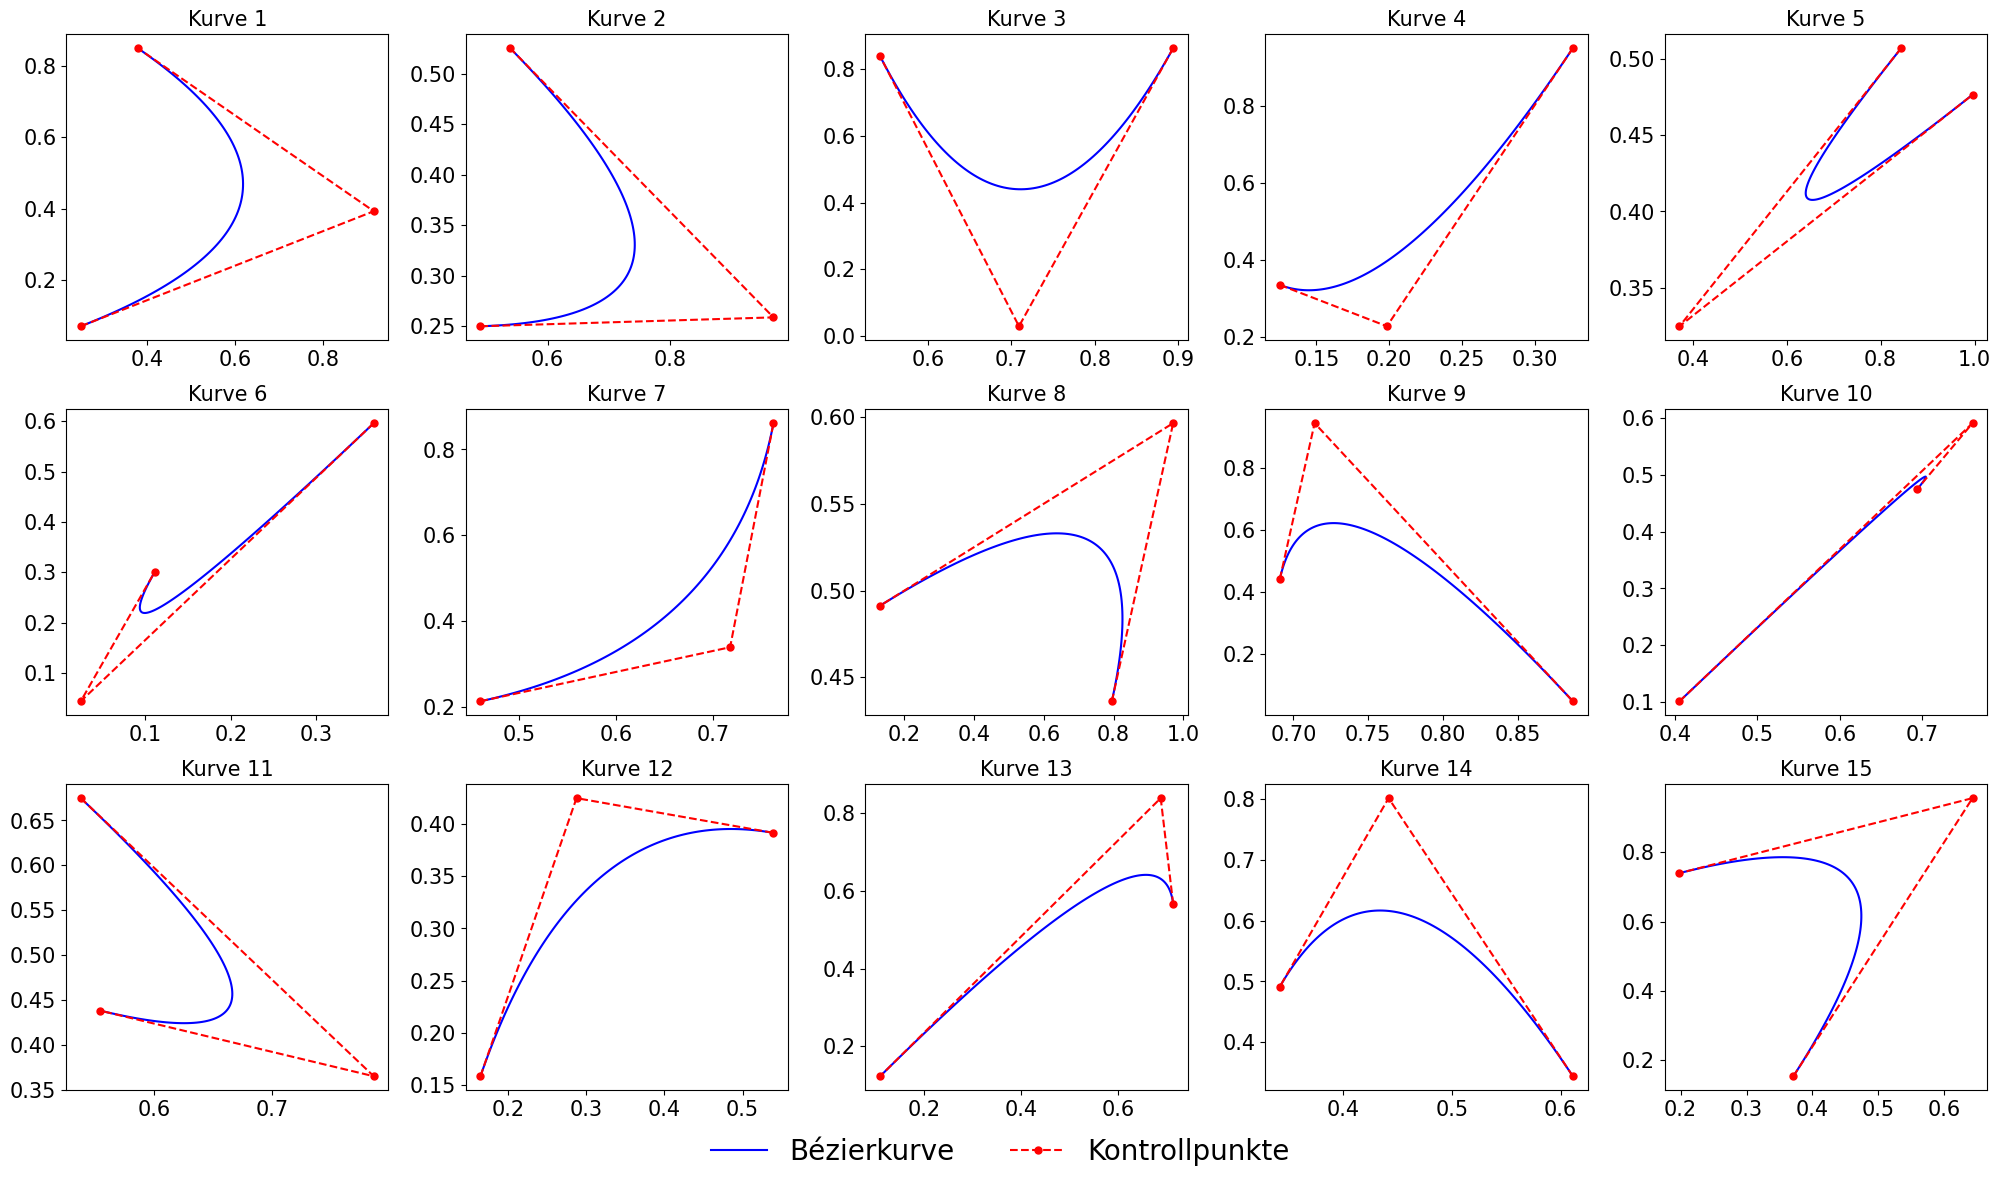

In [80]:
# 3. Plotten der ersten 15 zufallsgenerierten Bézierkurven zur Ansicht

fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # 3x5 Raster für 15 Kurven
axes = axes.flatten()  # Umwandeln der Achsen in Eindimensionalität für einfachere Iteration

# Für die ersten 15 Bézierkurven
for idx, control_points in enumerate(punkte_cubic[:15]):  # Nur die ersten 15 Kontrollpunkt-Sets
    bezier_curve = generate_bezier_points(control_points)  # Punkte auf der Bézierkurve generieren
    
    ax = axes[idx]
    control_points = np.array(control_points)  # Sicherstellen, dass Kontrollpunkte ein NumPy-Array sind
    
    # Plot der Bézierkurve
    ax.plot(bezier_curve[:, 0], bezier_curve[:, 1], color='blue')  # Blaue Bézierkurve
    # Kontrollpunkte plotten
    ax.plot(control_points[:, 0], control_points[:, 1], 'ro--', markersize=5)  # Rote Kontrollpunkte
    ax.set_title(f"Kurve {idx + 1}", fontsize=15)  
    ax.tick_params(axis='both', labelsize=15)  # Schriftgröße für die Achsenticks

# Entfernen überschüssiger Subplots, falls weniger als 15 Kurven vorhanden
for ax in axes[len(punkte_cubic[:15]):]:
    ax.axis('off')

# Globale Legende hinzufügen
fig.legend(
    ['Bézierkurve', 'Kontrollpunkte'], 
    loc='lower center', 
    ncol=2, 
    fontsize=20, 
    frameon=False
)

# Layout anpassen und anzeigen
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Platz für die globale Legende unten schaffen
plt.show()

In [82]:
# 4. Modell fitten und ausgeben 
# mit einigen Zusatzinformationen zur besseren Beurteilung

# Bestimmen und Ausgabe der kürzesten und längsten Länge, Durchschnitt und Median
min_length = df_trainingsdaten['Length'].round(5).min()        # Kürzeste Länge
max_length = df_trainingsdaten['Length'].round(5).max()        # Längste Länge
mean_length = df_trainingsdaten['Length'].mean().round(5)      # Durchschnitt
median_length = df_trainingsdaten['Length'].round(5).median()  # Median

print(
    f"Längen der Kurven: [{min_length}, {max_length}]\n"
    f"Mittelwert: {mean_length}\n"
    f"Median: {median_length}\n"
)

# Definition der Merkmale (Features) und des Zielwerts (Target)
# X: Eingabevariablen (Abstände zwischen den Kontrollpunkten)
X = df_trainingsdaten[['D_P0_P1', 'D_P0_P2', 'D_P1_P2']]
# y: Zielvariable (Länge der Bézierkurve)
y = df_trainingsdaten['Length']

# Aufteilen der Daten in Trainings- und Testdatensätze
# 80% der Daten werden für das Training verwendet, 20% für das Testen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des Modells
# Initialisierung eines linearen Regressionsmodells
model = LinearRegression()
# Training des Modells mit den Trainingsdaten
model.fit(X_train, y_train)

# Vorhersagen mit dem Modell
# Vorhersage der Zielwerte basierend auf den Testdaten
y_pred = model.predict(X_test)

# Evaluierung des Modells
# Berechnung der mittleren quadratischen Abweichung (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")  # Ausgabe der Abweichung

# Ausgabe der Modellparameter
# Die Koeffizienten der linearen Regression zeigen die Gewichtungen der einzelnen Merkmale
coefficients = model.coef_
intercept = model.intercept_  # Modell-Intercept 
print(f"Intercept: {intercept}\n")  # Ausgabe des Intercept
features = X.columns  # Speichert die Spaltennamen von X in der Variablen features

# Labels für den Index erstellen, gleichen Variablennamen im Paper
labels = ['a', 'b', 'c']

# Erstellen eines DataFrame und setzen der Labels als Index
coef_df = pd.DataFrame({
    'Variable': labels,
    'Gewicht': coefficients.round(5),
    'Feature': features
})

# Ausgabe der Modellkoeffizienten
print("Gewichte der Linearen Regression:")
print(coef_df)

Längen der Kurven: [0.13277, 1.32379]
Mittelwert: 0.73234
Median: 0.737665

Mean Squared Error: 0.0008903072326021079
Intercept: 0.0036050850519133704

Gewichte der Linearen Regression:
  Variable  Gewicht  Feature
0        a  0.42380  D_P0_P1
1        b  0.52462  D_P0_P2
2        c  0.43046  D_P1_P2


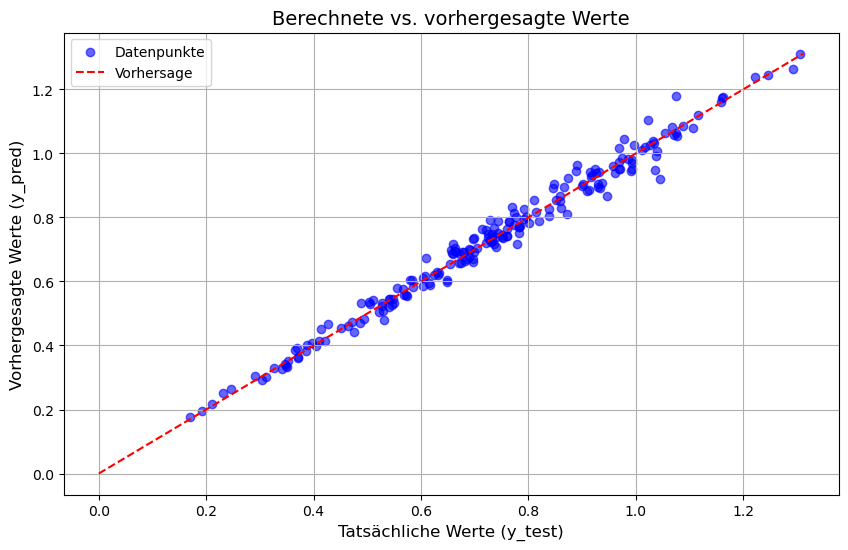

In [84]:
# 5. Plotten der realen Werte vs. der Vorhersage

# Anlage des Diagramms
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Datenpunkte')  # Streudiagramm

# Hinzufügen der Diagonalen für die Vorhersage
min_value = min(y_test.min(), y_pred.min(), 0)  # Kleinster Wert in den Daten
max_value = max(y_test.max(), y_pred.max())  # Größter Wert in den Daten
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Vorhersage')

# Achsenbeschriftungen und Titel
plt.xlabel('Tatsächliche Werte (y_test)', fontsize=12)
plt.ylabel('Vorhergesagte Werte (y_pred)', fontsize=12)
plt.title('Berechnete vs. vorhergesagte Werte', fontsize=14)

# Hinzufügen einer Legende und eines Gitters
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()

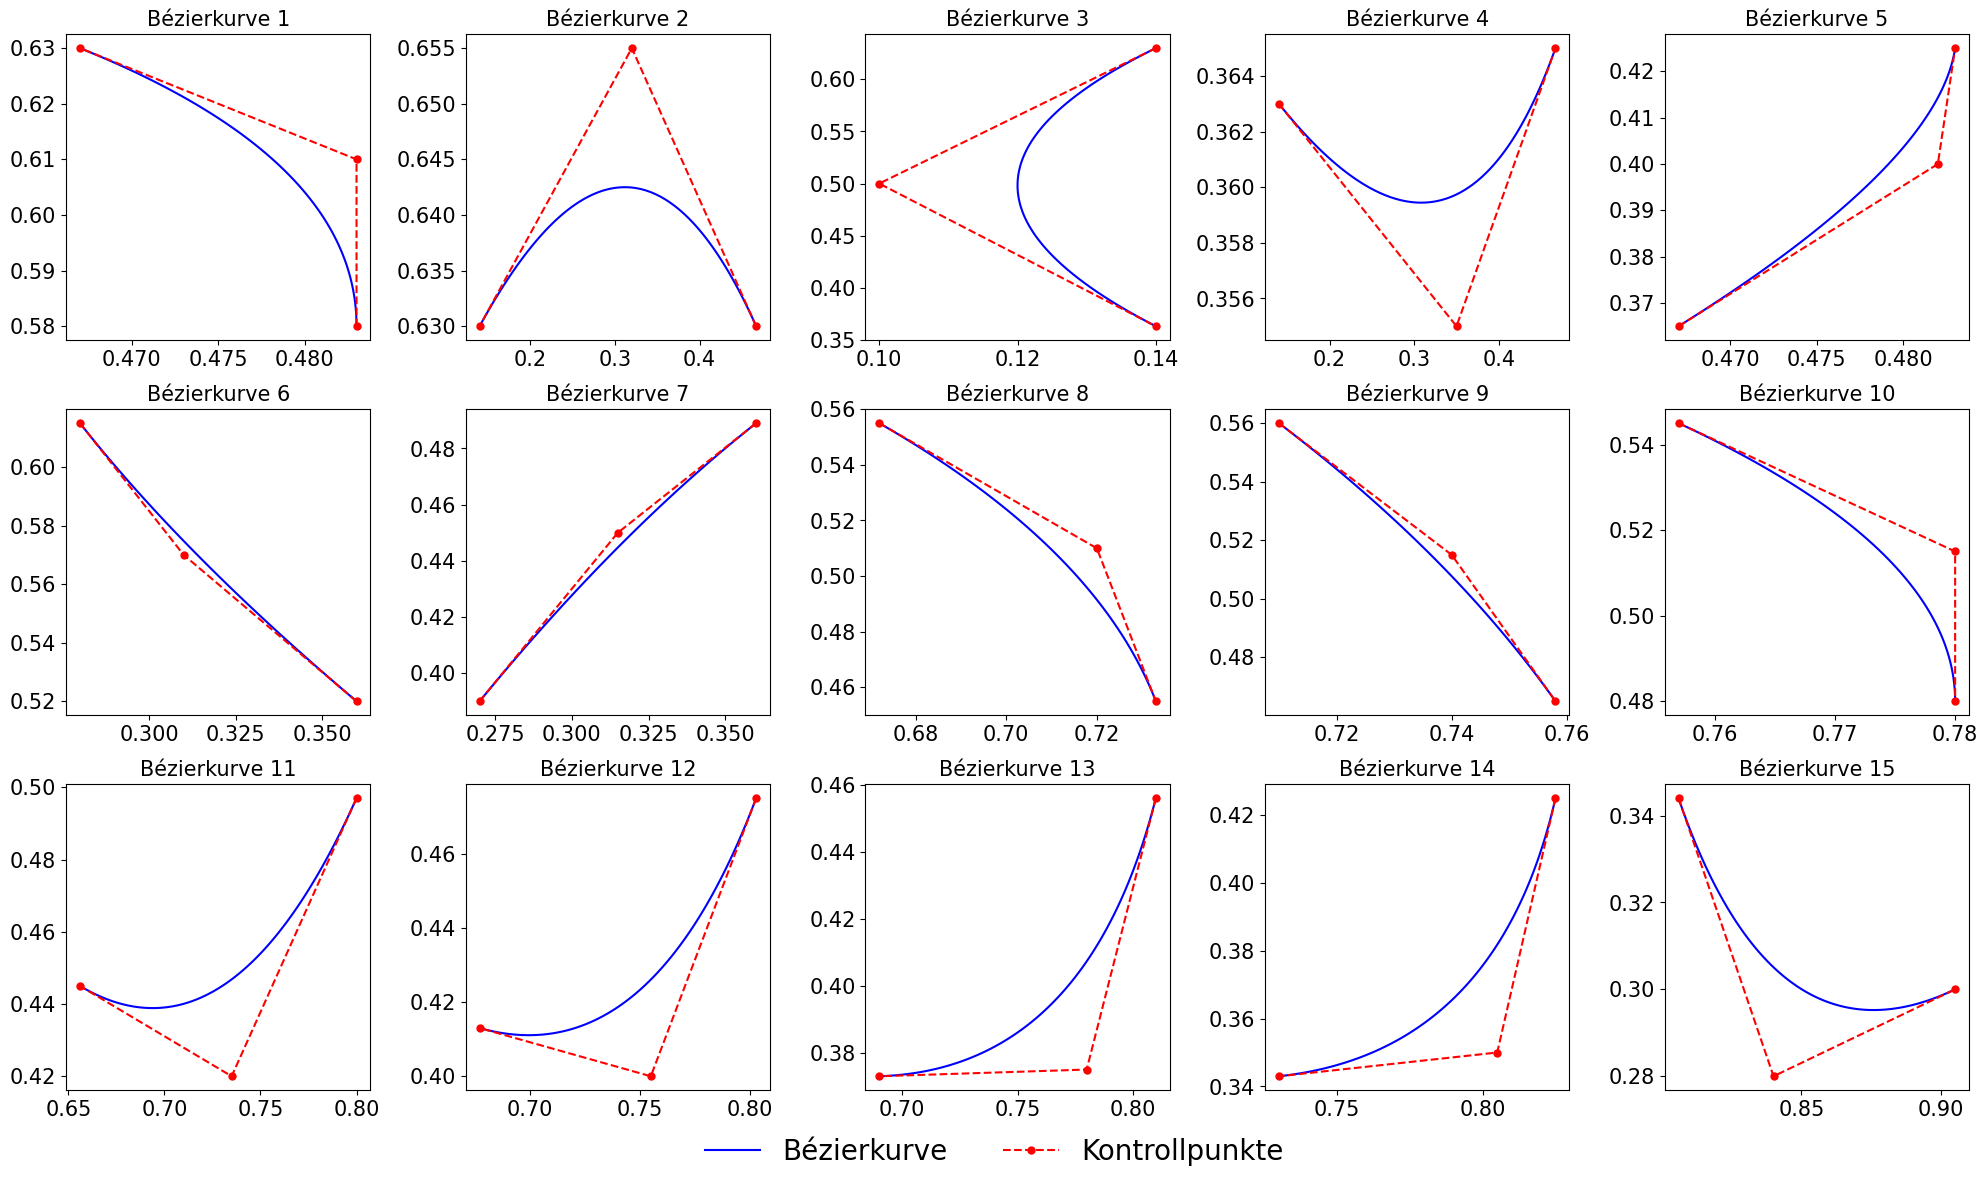

In [86]:
# 6. Einführen und Plotten von Testdaten aus realen Projekten
# Siehe https://github.com/benjaminwand/cookie-cutters

punkte_testdaten = [ 
# chaosknoten
[[0.483, 0.58], [0.483, 0.61], [0.467, 0.63]],
[[0.467, 0.63], [0.32, 0.655], [0.14, 0.63]],
[[0.14, 0.63], [0.1, 0.5], [0.14, 0.363]],
[[0.14, 0.363], [0.35, 0.355], [0.467, 0.365]],
[[0.467, 0.365], [0.482, 0.4], [0.483, 0.425]],
[[0.28, 0.615], [0.31, 0.57], [0.36, 0.52]],
[[0.27, 0.39], [0.315, 0.45], [0.36, 0.489]],
[[0.672, 0.555], [0.72, 0.51], [0.733, 0.455]],
[[0.71, 0.56], [0.74, 0.515], [0.758, 0.465]],
[[0.757, 0.545], [0.78, 0.515], [0.78, 0.48]],
[[0.8, 0.497], [0.735, 0.42], [0.656, 0.445]],
[[0.803, 0.475], [0.755, 0.4], [0.677, 0.413]],
[[0.81, 0.456], [0.78, 0.375], [0.69, 0.373]],
[[0.825, 0.425], [0.805, 0.35], [0.73, 0.343]],
[[0.806, 0.344], [0.84, 0.28], [0.905, 0.3]],
[[0.809, 0.348], [0.87, 0.235], [0.795, 0.187]],
[[0.74, 0.176], [0.725, 0.174], [0.71, 0.174]]
]

# Begrenzung auf die ersten 15 Bézierkurven
punkte_testdaten = punkte_testdaten[:15]  # Nur die ersten 15 Kurven verwenden

# Plotten der Bézierkurven aus den punkte_testdaten
fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # 3x5 Raster für 15 Kurven
axes = axes.flatten()  # Achsen in flache Liste umwandeln

# Plot jeder Bézierkurve
for idx, control_points in enumerate(punkte_testdaten):
    bezier_curve = generate_bezier_points(np.array(control_points))  # Bézierkurve berechnen
    control_points = np.array(control_points)  # Kontrollpunkte in NumPy-Array umwandeln
    
    ax = axes[idx]
    # Bézierkurve plotten
    ax.plot(bezier_curve[:, 0], bezier_curve[:, 1], color="blue")
    # Kontrollpunkte plotten
    ax.plot(control_points[:, 0], control_points[:, 1], 'ro--', markersize=5)
    # Titel für jede Kurve
    ax.set_title(f"Bézierkurve {idx + 1}", fontsize=15)
    ax.tick_params(axis='both', labelsize=15)  # Schriftgröße für die Achsenticks

# Überschüssige Subplots deaktivieren (falls weniger als 15 Kurven vorhanden sind)
for ax in axes[len(punkte_testdaten):]:
    ax.axis('off')

# Globale Legende hinzufügen
fig.legend(
    ['Bézierkurve', 'Kontrollpunkte'], 
    loc='lower center', 
    ncol=2, 
    fontsize=20, 
    frameon=False
)

# Layout anpassen und anzeigen
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Platz für die globale Legende unten schaffen
plt.show()

In [88]:
# 7. Berechnung und Ausgabe der Abstände zwischen den Kontrollpunkten für den Testdatensatz

test_daten = []
for control_points in punkte_testdaten:

    # Kontrollpunkte in NumPy-Array konvertieren
    control_points = np.array(control_points)

    bezier_points = generate_bezier_points(control_points)  # Generierung der Bézierkurve
    length = curve_length(bezier_points)  # Berechnung der Länge der Bézierkurve
    
    d01 = point_distance(control_points[0], control_points[1])  # Distanz zwischen P0 und P1
    d02 = point_distance(control_points[0], control_points[2])  # Distanz zwischen P0 und P2
    d12 = point_distance(control_points[1], control_points[2])  # Distanz zwischen P1 und P2
    
    # Speichern der Ergebnisse als Eintrag
    entry = {
        'D_P0_P1': d01,   # Distanz zwischen P0 und P1
        'D_P0_P2': d02,   # Distanz zwischen P0 und P2
        'D_P1_P2': d12,   # Distanz zwischen P1 und P2
        'Length': length, # Länge der Bézierkurve
    }
    test_daten.append(entry)

# Umwandeln der Testdaten in ein DataFrame
df_test = pd.DataFrame(test_daten)

# Berechnung und Hinzufügen der Vorhersagen für jede Zeile im DataFrame df_test
df_test['Predicted_Length'] = (
    df_test[features].dot(coefficients) + intercept
)

# Ausgabe des DataFrame
print("Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:\n")
print(df_test)

Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:

     D_P0_P1   D_P0_P2   D_P1_P2    Length  Predicted_Length
0   0.030000  0.052498  0.025612  0.053545          0.054886
1   0.149111  0.327000  0.181728  0.328277          0.316576
2   0.136015  0.267000  0.142720  0.270944          0.262758
3   0.210152  0.327006  0.117427  0.327191          0.314770
4   0.038079  0.062097  0.025020  0.062426          0.063090
5   0.054083  0.124197  0.070711  0.124395          0.122120
6   0.075000  0.133795  0.059548  0.134045          0.131215
7   0.065795  0.117137  0.056515  0.118872          0.117269
8   0.054083  0.106438  0.053141  0.106700          0.105240
9   0.037802  0.068949  0.035000  0.070247          0.070864
10  0.100767  0.153101  0.082861  0.163602          0.162299
11  0.089045  0.140428  0.079076  0.149978          0.149053
12  0.086377  0.145908  0.090022  0.156458          0.155509
13  0.077621  0.125495  0.075326  0.135010          0

In [90]:
# 8. Ausgabe der mittleren quadratischen Abweichung 
# mit einigen Zusatzinformationen zur besseren Beurteilung

# Bestimmen und Ausgabe der kürzesten und längsten Länge
min_length = df_test['Length'].round(4).min()    # Kürzeste Länge
max_length = df_test['Length'].round(4).max()    # Längste Länge
mean_length = df_test['Length'].mean().round(4)  # Durchschnitt
median_length = df_test['Length'].round(4).median()  # Median

print(
    f"Längen der Kurven: [{min_length}, {max_length}]\n"
    f"Mittelwert: {mean_length}\n"
    f"Median: {median_length}\n"
)

# Vergleich der vorhergesagten und tatsächlichen Längen
mse = mean_squared_error(df_test['Length'], df_test['Predicted_Length'])
print(f"Mean Squared Error (MSE): {mse}")

Längen der Kurven: [0.0535, 0.3283]
Mittelwert: 0.1548
Median: 0.134

Mean Squared Error (MSE): 2.5526533627110957e-05


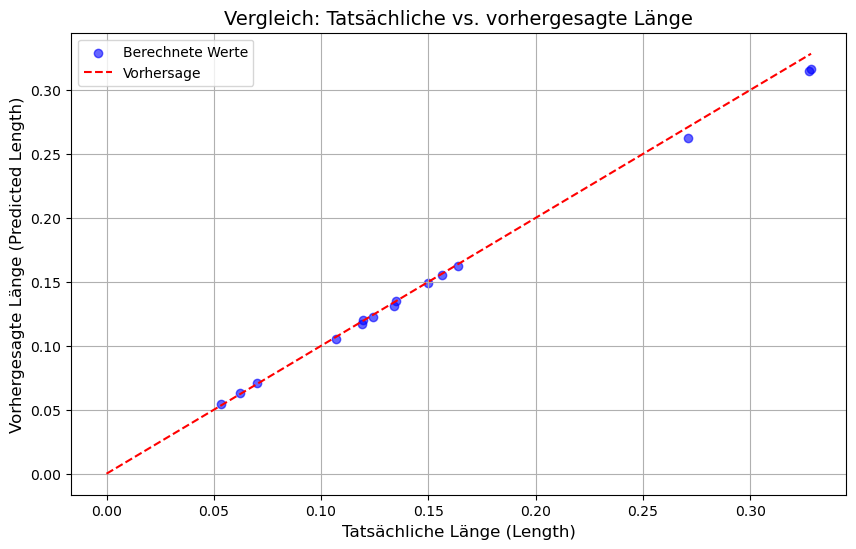

In [92]:
# 9. Erstellen des Plots der Vorhersage und Testdaten gegenüberstellt

plt.figure(figsize=(10, 6))
plt.scatter(df_test['Length'], df_test['Predicted_Length'], color='blue', alpha=0.6, label='Berechnete Werte')

# Hinzufügen der Diagonalen für perfekte Vorhersage
max_value = max(df_test['Length'].max(), df_test['Predicted_Length'].max())
min_value = min(df_test['Length'].min(), df_test['Predicted_Length'].min(), 0)
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Vorhersage')

# Achsenbeschriftungen und Titel
plt.xlabel('Tatsächliche Länge (Length)', fontsize=12)
plt.ylabel('Vorhergesagte Länge (Predicted Length)', fontsize=12)
plt.title('Vergleich: Tatsächliche vs. vorhergesagte Länge', fontsize=14)
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()